In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define and load all datasets
query1_data = pd.read_excel('./Datasets/Query_1_Results.xlsx')
query2_data = pd.read_excel('./Datasets/Query_2_Results.xlsx')
query3_data = pd.read_excel('./Datasets/Query_3_Results.xlsx')
query5_data = pd.read_excel('./Datasets/Query_5_Results.xlsx')

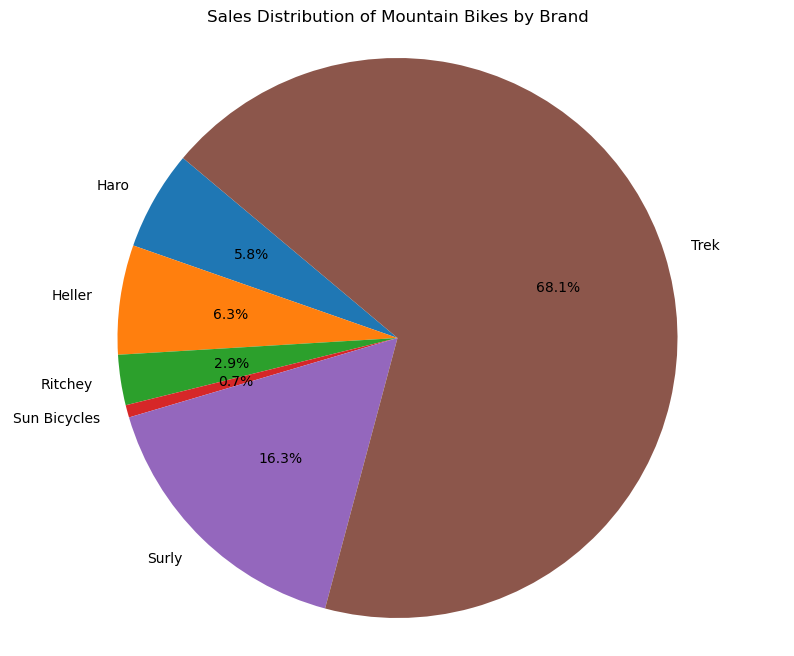

In [4]:
# Filtering the data for Mountain Bikes
mountain_bikes = query5_data[query5_data['Category/ Model Name'] == 'Mountain Bikes']

# Grouping the data by brand and summing the total sales
brand_sales = mountain_bikes.groupby('Brand Name')['total_sales'].sum()

# Convert to numpy array for pie chart
labels = np.array(brand_sales.index)
sizes = np.array(brand_sales.values)

# Creating a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution of Mountain Bikes by Brand')
plt.axis('equal')

# Display the pie chart
plt.show()

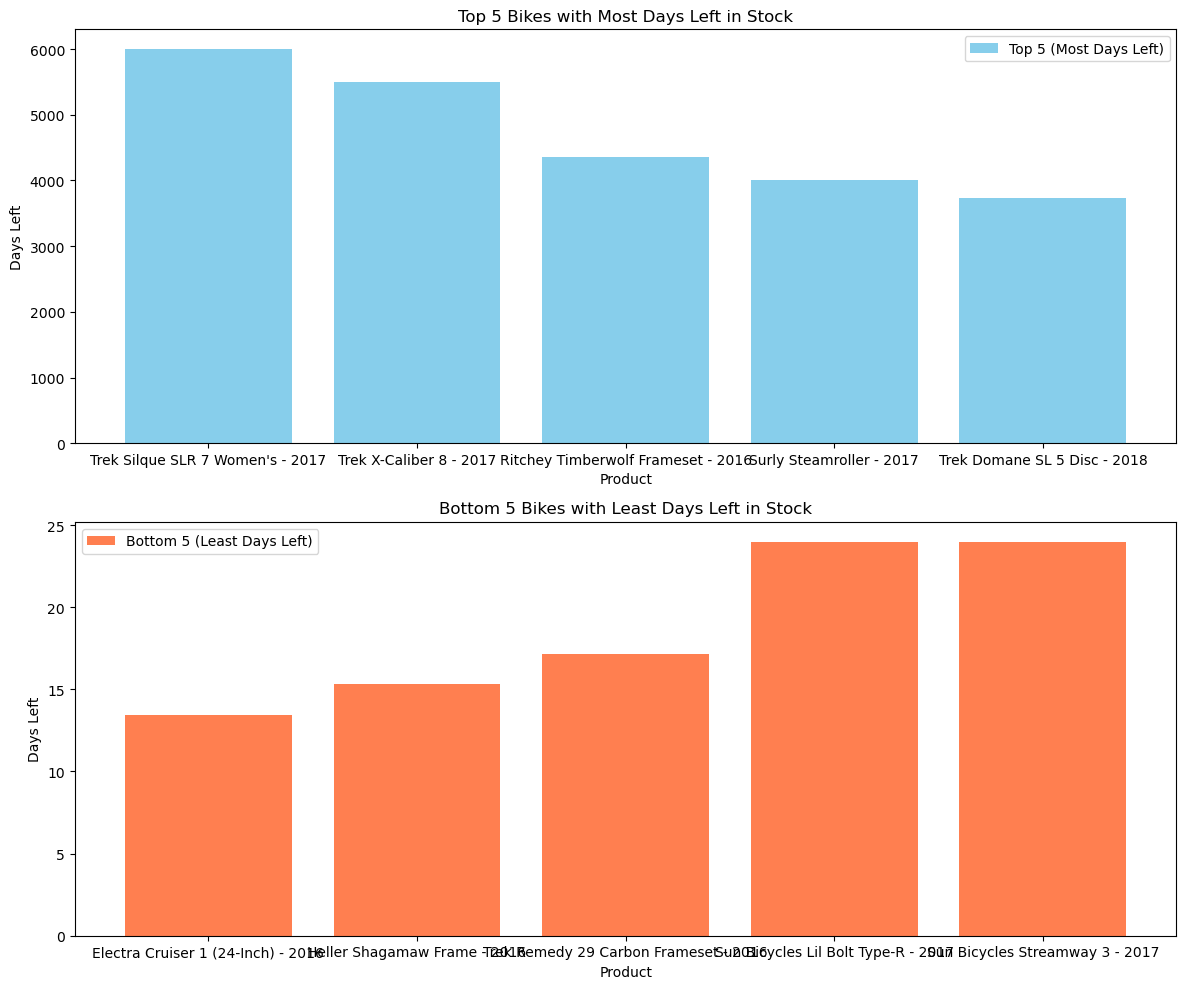

In [13]:
# Calculate days left based on average bi-monthly sales and current stock
query3_data["Days Left"] = (query3_data["stock_quantity"] / query3_data["Average Bikes Sold per Month"]) * 60

mask = query3_data["Days Left"] > 0

data_masked = query3_data[mask]

# Select relevant columns and sort by days left
data_filtered = data_masked[["product_name", "Days Left"]].sort_values(by="Days Left", ascending=False)


# Select top 5 products with highest days left
top_5_products = data_filtered.nlargest(5, "Days Left")

# Select bottom 5 products with lowest days left
low_5_products = data_filtered.nsmallest(5, "Days Left")

# Create a combined bar chart
fig, axs = plt.subplots(2, figsize=(12, 10))

# Plot top 5 products
axs[0].bar(top_5_products["product_name"], top_5_products["Days Left"], color='skyblue', label='Top 5 (Most Days Left)')
axs[0].set_xlabel("Product")
axs[0].set_ylabel("Days Left")
axs[0].set_title("Top 5 Bikes with Most Days Left in Stock")
axs[0].legend()

# Plot bottom 5 products
axs[1].bar(low_5_products["product_name"], low_5_products["Days Left"], color='coral', label='Bottom 5 (Least Days Left)')
axs[1].set_xlabel("Product")
axs[1].set_ylabel("Days Left")
axs[1].set_title("Bottom 5 Bikes with Least Days Left in Stock")
axs[1].legend()

# Adjust spacing and layout
plt.tight_layout()
plt.show()

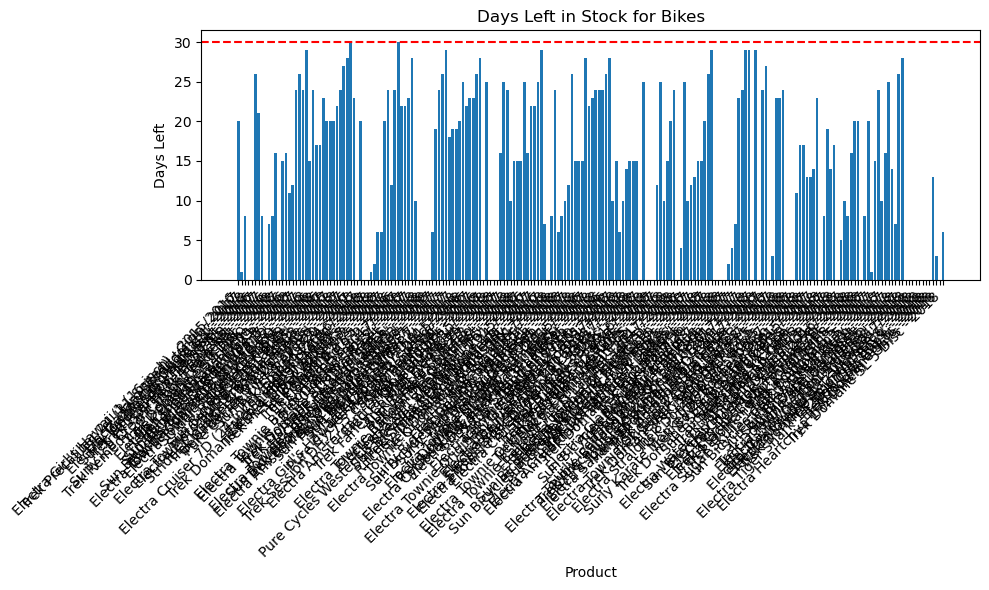

<BarContainer object of 153 artists>

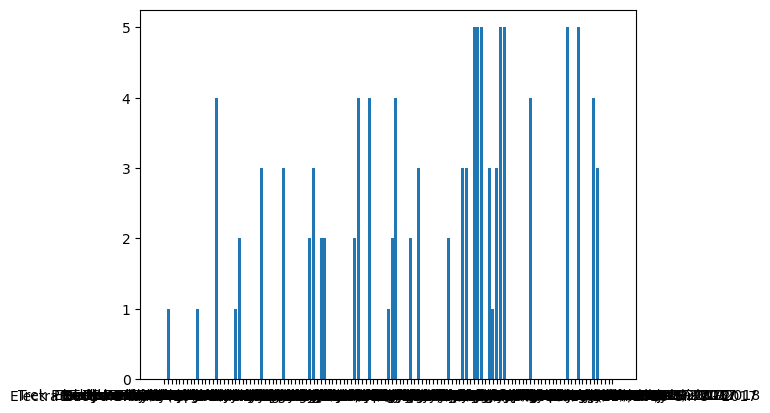

In [25]:
# Create a bar chart of Days Left for each product
plt.figure(figsize=(10, 6))
plt.bar(query3_data["product_name"], query3_data["Days Left til Sold Out"])
plt.axhline(y=30, color='red', linestyle='--', label='Restock Threshold')
plt.xlabel("Product")
plt.ylabel("Days Left")
plt.title("Days Left in Stock for Bikes")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

low_stock_products = query3_data[query3_data["Days Left til Sold Out"] <= 14]  # Adjust threshold as needed
plt.bar(low_stock_products["product_name"], low_stock_products["Days Left til Sold Out"])
